<a href="https://colab.research.google.com/github/brunoscog/Alura_One_Data_Science_Challenge_1/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aura|ONE - Challenge 1 Tech Foundations**
###*Python para Data Science*

##**Importação dos dados**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


##**Loja 1**

###Visualização de Dados

In [ ]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


###Estatísticas Básicas

In [ ]:
# Estatísticas básicas
print()
print("Estatísticas básicas:")
print(loja.describe())
print()
print("=" * 50)

# Colunas e tipos de dados
print()
print("Informações sobre o DataFrame:")
print(loja.info())
print()
print("=" * 50)


# Valores ausentes
print()
print("Verificação de valores ausentes:")
print(loja.isnull().sum())


Estatísticas básicas:
             Preço        Frete  Avaliação da compra  Quantidade de parcelas  \
count  2359.000000  2359.000000          2359.000000             2359.000000   
mean    650.491361    34.691805             3.976685                2.943196   
std     819.582778    43.814183             1.415370                2.819897   
min      10.070000     0.000000             1.000000                1.000000   
25%      74.345000     4.141783             3.000000                1.000000   
50%     313.750000    16.498835             5.000000                1.000000   
75%     904.130000    48.050074             5.000000                4.000000   
max    3969.380000   214.377060             5.000000               24.000000   

               lat          lon  
count  2359.000000  2359.000000  
mean    -20.763366   -47.349385  
std       5.372400     4.183180  
min     -30.170000   -70.550000  
25%     -22.250000   -48.790000  
50%     -22.190000   -48.790000  
75%     -18.100000

###Faturamento Total

In [ ]:
loja["Faturamento"] = loja["Preço"]

faturamento_total = loja["Faturamento"].sum()
print(f"O faturamento total da Loja 1 é: R$ {round(faturamento_total, 2)}")

O faturamento total da Loja 1 é: R$ 1534509.12


### Vendas por Categoria


In [ ]:
# Faturamento por categoria
faturamento_categoria = loja.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
print("Faturamento por categoria na Loja 1 (em R$):\n", faturamento_categoria.round(2))

Faturamento por categoria na Loja 1 (em R$):
 Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64


In [ ]:
# Proporção faturamento por categoria
faturamento_total = loja["Preço"].sum()
print("\nProporção do faturamento por categoria (%):\n", (faturamento_categoria / faturamento_total * 100).round(2))


Proporção do faturamento por categoria (%):
 Categoria do Produto
eletronicos              37.32
eletrodomesticos         31.60
moveis                   16.30
instrumentos musicais     7.93
esporte e lazer           3.41
brinquedos                1.56
utilidades domesticas     1.10
livros                    0.76
Name: Preço, dtype: float64


In [ ]:
# Calcular itens vendidos por catetoria (Loja 1)
categorias = loja["Categoria do Produto"].value_counts()
print("Categorias mais vendidas:\n", categorias)

Categorias mais vendidas:
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64


### Avaliação das Lojas

In [ ]:
# Avaliações

avaliacoes = loja["Avaliação da compra"].value_counts().sort_index()
print("Distribuição das avaliações na Loja 1:\n", avaliacoes)
print("Média das avaliações:", round(loja["Avaliação da compra"].mean(), 2))

Distribuição das avaliações na Loja 1:
 Avaliação da compra
1     319
2      86
3     218
4     444
5    1292
Name: count, dtype: int64
Média das avaliações: 3.98


### Produtos Mais e Menos Vendidos

In [ ]:
# Proutos mais vendidos (Loja 1)
produtos_mais = loja["Produto"].value_counts()
print("Produtos mais vendidos na Loja 1:\n", produtos_mais.head(10))
print()
print("=" * 50)

# Proutos menos vendidos (Loja 1)
print()
produtos_menos = loja["Produto"].value_counts().sort_values(ascending=True)
print("Produtos menos vendidos na Loja 1:\n", produtos_menos.head(10))


Produtos mais vendidos na Loja 1:
 Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Blocos de montar      56
Bola de basquete      55
Bicicleta             54
Copo térmico          54
Geladeira             54
Name: count, dtype: int64


Produtos menos vendidos na Loja 1:
 Produto
Headset                        33
Celular ABXY                   33
Panela de pressão              35
Pandeiro                       36
Mochila                        39
Ciência de dados com python    39
Corda de pular                 40
Assistente virtual             40
Boneca bebê                    40
Dinossauro Rex                 40
Name: count, dtype: int64


### Análise de fretes


In [ ]:
# Frete médio da loja
frete_medio = loja["Frete"].mean()
print(f"O frete médio da loja é: R$ {round(frete_medio, 2)}")

O frete médio da loja é: R$ 34.69


In [ ]:
# Análise de fretes

fretes_altos = loja[loja["Frete"] > 100][["Produto", "Preço", "Frete", "Avaliação da compra"]]
print("Vendas com fretes acima de R$ 100:\n", fretes_altos)

Vendas com fretes acima de R$ 100:
                  Produto    Preço       Frete  Avaliação da compra
8     Lavadora de roupas  2024.31  105.372857                    1
10             Geladeira  3241.75  170.197874                    5
11           Lava louças  1889.50  100.898967                    5
18         TV Led UHD 4K  2522.26  143.883701                    3
65      Celular Plus X42  3367.25  179.982945                    4
...                  ...      ...         ...                  ...
2315       TV Led UHD 4K  3527.40  185.407877                    5
2317           Geladeira  3081.76  161.678888                    5
2318       TV Led UHD 4K  2131.82  114.200014                    5
2327  Lavadora de roupas  1912.38  102.359586                    4
2331           Geladeira  3190.23  167.454589                    5

[239 rows x 4 columns]


In [ ]:
# Frete médio por categoria
frete_por_categoria = loja.groupby("Categoria do Produto")["Frete"].mean().sort_values(ascending=False)
print("Frete médio por categoria (Loja 1):\n")
print(frete_por_categoria.round(2))


Frete médio por categoria (Loja 1):

Categoria do Produto
eletrodomesticos         82.58
eletronicos              68.35
instrumentos musicais    35.78
moveis                   28.66
esporte e lazer           9.96
utilidades domesticas     5.02
brinquedos                4.03
livros                    3.60
Name: Frete, dtype: float64


In [ ]:
# Frete médio por produto
frete_por_produto = loja.groupby("Produto")["Frete"].mean().sort_values(ascending=False)
print("Frete médio por produto (Loja 1):\n")
print(frete_por_produto.head(10).round(2))


Frete médio por produto (Loja 1):

Produto
TV Led UHD 4K         168.69
Geladeira             147.70
Celular Plus X42      142.55
Smart TV              109.24
Lavadora de roupas     98.76
Lava louças            91.77
Tablet ABXY            81.07
Secadora de roupas     72.51
Celular ABXY           70.61
Guitarra               56.71
Name: Frete, dtype: float64


##**Loja 2**

###Visualização de Dados

In [ ]:
loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


###Estatísticas Básicas

In [ ]:
# Estatísticas básicas
print()
print("Estatísticas básicas:")
print(loja2.describe())
print()
print("=" * 50)

# Colunas e tipos de dados
print()
print("Informações sobre o DataFrame:")
print(loja2.info())
print()
print("=" * 50)


# Valores ausentes
print()
print("Verificação de valores ausentes:")
print(loja2.isnull().sum())


Estatísticas básicas:
             Preço        Frete  Avaliação da compra  Quantidade de parcelas  \
count  2359.000000  2359.000000          2359.000000             2359.000000   
mean    630.970352    33.621941             4.037304                2.902501   
std     794.078997    42.321932             1.356153                2.848416   
min      10.160000     0.000000             1.000000                1.000000   
25%      72.730000     3.904020             4.000000                1.000000   
50%     290.960000    15.406740             5.000000                1.000000   
75%     903.580000    47.250196             5.000000                4.000000   
max    3937.850000   216.707633             5.000000               24.000000   

               lat          lon  
count  2359.000000  2359.000000  
mean    -20.473243   -47.098508  
std       5.321015     4.169111  
min     -30.170000   -70.550000  
25%     -22.250000   -48.790000  
50%     -22.190000   -48.790000  
75%     -18.100000

###Faturamento Total

In [ ]:
loja2["Faturamento"] = loja2["Preço"]

faturamento_total2 = loja2["Faturamento"].sum()
print(f"O faturamento total da Loja 2 é: R$ {round(faturamento_total2, 2)}")

O faturamento total da Loja 2 é: R$ 1488459.06


### Vendas por Categoria


In [ ]:
# Faturamento por categoria
faturamento_categoria2 = loja2.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
print("Faturamento por categoria na Loja 2 (em R$):\n", faturamento_categoria2.round(2))

Faturamento por categoria na Loja 2 (em R$):
 Categoria do Produto
eletronicos              547773.71
eletrodomesticos         464758.13
moveis                   235234.68
instrumentos musicais    139987.03
esporte e lazer           46326.09
brinquedos                21262.21
utilidades domesticas     19662.86
livros                    13454.35
Name: Preço, dtype: float64


In [ ]:
# Proporção faturamento por categoria
faturamento_total2 = loja2["Preço"].sum()
print("\nProporção do faturamento por categoria (%):\n", (faturamento_categoria2 / faturamento_total2 * 100).round(2))


Proporção do faturamento por categoria (%):
 Categoria do Produto
eletronicos              36.80
eletrodomesticos         31.22
moveis                   15.80
instrumentos musicais     9.40
esporte e lazer           3.11
brinquedos                1.43
utilidades domesticas     1.32
livros                    0.90
Name: Preço, dtype: float64


In [ ]:
# Ítens vendidos por catetoria
categorias2 = loja2["Categoria do Produto"].value_counts()
print("Categorias mais vendidas:\n", categorias2)

Categorias mais vendidas:
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64


### Avaliação das Lojas

In [ ]:
# Avaliações

avaliacoes2 = loja2["Avaliação da compra"].value_counts().sort_index()
print("Distribuição das avaliações na Loja 2:\n", avaliacoes2)
print("Média das avaliações:", round(loja2["Avaliação da compra"].mean(), 2))

Distribuição das avaliações na Loja 2:
 Avaliação da compra
1     273
2      93
3     209
4     482
5    1302
Name: count, dtype: int64
Média das avaliações: 4.04


### Produtos Mais e Menos Vendidos

In [ ]:
# Proutos mais vendidos
produtos_mais2 = loja2["Produto"].value_counts()
print("Produtos mais vendidos na Loja 2:\n", produtos_mais2.head(10))
print()
print("=" * 50)

# Proutos menos vendidos
print()
produtos_menos2 = loja2["Produto"].value_counts().sort_values(ascending=True)
print("Produtos menos vendidos na Loja 2:\n", produtos_menos2.head(10))


Produtos mais vendidos na Loja 2:
 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Secadora de roupas          57
Celular Plus X42            55
Blocos de montar            54
Guarda roupas               54
Jogo de panelas             52
Name: count, dtype: int64


Produtos menos vendidos na Loja 2:
 Produto
Jogo de tabuleiro     32
Mesa de jantar        34
Impressora            34
Poltrona              35
Fone de ouvido        37
Assistente virtual    38
Faqueiro              39
Smart TV              40
Celular ABXY          41
Fogão                 42
Name: count, dtype: int64


### Análise de fretes


In [ ]:
# Frete médio da loja
frete_medio2 = loja2["Frete"].mean()
print(f"O frete médio da loja é: R$ {round(frete_medio2, 2)}")

O frete médio da loja é: R$ 33.62


In [ ]:
# Análise de fretes

fretes_altos2 = loja2[loja2["Frete"] > 100][["Produto", "Preço", "Frete", "Avaliação da compra"]]
print("Vendas com fretes acima de R$ 100:\n", fretes_altos2)

Vendas com fretes acima de R$ 100:
                  Produto    Preço       Frete  Avaliação da compra
23           Lava louças  2093.07  111.732807                    5
30         TV Led UHD 4K  3546.49  189.123049                    5
39              Smart TV  2205.06  114.997250                    5
45             Geladeira  2423.51  129.933032                    3
49    Lavadora de roupas  2086.95  112.012224                    5
...                  ...      ...         ...                  ...
2307       TV Led UHD 4K  2106.12  118.386489                    5
2313           Geladeira  2779.44  148.527923                    5
2319            Smart TV  2467.60  131.923381                    5
2351    Celular Plus X42  1941.61  112.479278                    1
2357    Celular Plus X42  2965.72  155.500107                    5

[226 rows x 4 columns]


In [ ]:
# Frete médio por categoria
frete_por_categoria2 = loja2.groupby("Categoria do Produto")["Frete"].mean().sort_values(ascending=False)
print("Frete médio por categoria (Loja 2):\n")
print(frete_por_categoria2.round(2))


Frete médio por categoria (Loja 2):

Categoria do Produto
eletrodomesticos         81.12
eletronicos              68.92
instrumentos musicais    33.08
moveis                   28.47
esporte e lazer           9.10
utilidades domesticas     5.90
brinquedos                3.78
livros                    3.76
Name: Frete, dtype: float64


In [ ]:
# Frete médio por produto
frete_por_produto2 = loja2.groupby("Produto")["Frete"].mean().sort_values(ascending=False)
print("Frete médio por produto (Loja 1):\n")
print(frete_por_produto2.head(10).round(2))


Frete médio por produto (Loja 1):

Produto
TV Led UHD 4K         163.05
Celular Plus X42      146.17
Geladeira             141.26
Smart TV              108.67
Lavadora de roupas     97.07
Lava louças            90.79
Tablet ABXY            90.54
Secadora de roupas     73.39
Celular ABXY           72.10
Guitarra               54.54
Name: Frete, dtype: float64


##**Loja 3**

###Visualização de Dados

In [ ]:
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79


###Estatísticas Básicas

In [ ]:
# Estatísticas básicas
print()
print("Estatísticas básicas:")
print(loja3.describe())
print()
print("=" * 50)

# Colunas e tipos de dados
print()
print("Informações sobre o DataFrame:")
print(loja3.info())
print()
print("=" * 50)


# Valores ausentes
print()
print("Verificação de valores ausentes:")
print(loja3.isnull().sum())


Estatísticas básicas:
             Preço        Frete  Avaliação da compra  Quantidade de parcelas  \
count  2359.000000  2359.000000          2359.000000             2359.000000   
mean    620.612560    33.074464             4.048326                2.967783   
std     774.191691    41.260516             1.386426                2.812153   
min      10.080000     0.000000             1.000000                1.000000   
25%      76.560000     4.149261             4.000000                1.000000   
50%     301.670000    15.879702             5.000000                2.000000   
75%     888.040000    46.635503             5.000000                4.000000   
max    3957.620000   211.257624             5.000000               24.000000   

               lat          lon  
count  2359.000000  2359.000000  
mean    -20.405396   -47.129233  
std       5.465572     4.197520  
min     -30.170000   -70.550000  
25%     -22.250000   -48.790000  
50%     -22.190000   -48.790000  
75%     -18.100000

###Faturamento Total

In [ ]:
loja3["Faturamento"] = loja3["Preço"]

faturamento_total3 = loja3["Faturamento"].sum()
print(f"O faturamento total da Loja 3 é: R$ {round(faturamento_total3, 2)}")

O faturamento total da Loja 3 é: R$ 1464025.03


### Vendas por Categoria


In [ ]:
# Faturamento por categoria
faturamento_categoria3 = loja3.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
print("Faturamento por categoria na Loja 3 (em R$):\n", faturamento_categoria3.round(2))

Faturamento por categoria na Loja 3 (em R$):
 Categoria do Produto
eletronicos              547699.92
eletrodomesticos         438984.89
moveis                   268095.56
instrumentos musicais    103174.45
esporte e lazer           47456.10
brinquedos                25869.20
utilidades domesticas     20080.21
livros                    12664.70
Name: Preço, dtype: float64


In [ ]:
# Proporção faturamento por categoria
faturamento_total3 = loja3["Preço"].sum()
print("\nProporção do faturamento por categoria (%):\n", (faturamento_categoria3 / faturamento_total3 * 100).round(2))


Proporção do faturamento por categoria (%):
 Categoria do Produto
eletronicos              37.41
eletrodomesticos         29.98
moveis                   18.31
instrumentos musicais     7.05
esporte e lazer           3.24
brinquedos                1.77
utilidades domesticas     1.37
livros                    0.87
Name: Preço, dtype: float64


In [ ]:
# Ítens vendidos por catetoria
categorias3 = loja3["Categoria do Produto"].value_counts()
print("Categorias mais vendidas:\n", categorias3)

Categorias mais vendidas:
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64


### Avaliação das Lojas

In [ ]:
# Avaliações

avaliacoes3 = loja3["Avaliação da compra"].value_counts().sort_index()
print("Distribuição das avaliações na Loja 3:\n", avaliacoes3)
print("Média das avaliações:", round(loja3["Avaliação da compra"].mean(), 2))

Distribuição das avaliações na Loja 3:
 Avaliação da compra
1     297
2      79
3     193
4     434
5    1356
Name: count, dtype: int64
Média das avaliações: 4.05


### Produtos Mais e Menos Vendidos

In [ ]:
# Proutos mais vendidos
produtos_mais3 = loja3["Produto"].value_counts()
print("Produtos mais vendidos na Loja 3:\n", produtos_mais3.head(10))
print()
print("=" * 50)

# Proutos menos vendidos
print()
produtos_menos3 = loja3["Produto"].value_counts().sort_values(ascending=True)
print("Produtos menos vendidos na Loja 3:\n", produtos_menos3.head(10))


Produtos mais vendidos na Loja 3:
 Produto
Kit banquetas               57
Mesa de jantar              56
Cama king                   56
Jogo de panelas             55
Cômoda                      55
Smart TV                    54
Fogão                       53
Corda de pular              53
Modelagem preditiva         53
Carrinho controle remoto    52
Name: count, dtype: int64


Produtos menos vendidos na Loja 3:
 Produto
Blocos de montar      35
Micro-ondas           36
Jogo de copos         36
Mochila               36
Copo térmico          38
Guitarra              38
Faqueiro              39
Headset               39
Assistente virtual    39
Boneca bebê           39
Name: count, dtype: int64


### Análise de fretes


In [ ]:
# Frete médio da loja
frete_medio3 = loja3["Frete"].mean()
print(f"O frete médio da loja é: R$ {round(frete_medio3, 2)}")

O frete médio da loja é: R$ 33.07


In [ ]:
# Análise de fretes

fretes_altos3 = loja3[loja3["Frete"] > 100][["Produto", "Preço", "Frete", "Avaliação da compra"]]
print("Vendas com fretes acima de R$ 100:\n", fretes_altos3)

Vendas com fretes acima de R$ 100:
                  Produto    Preço       Frete  Avaliação da compra
15         TV Led UHD 4K  2053.75  106.940448                    5
20    Lavadora de roupas  2003.23  107.554386                    1
42              Smart TV  2067.76  110.385125                    5
48              Smart TV  2344.16  125.108245                    5
57      Celular Plus X42  2345.56  125.425118                    5
...                  ...      ...         ...                  ...
2295       TV Led UHD 4K  3957.62  211.257624                    1
2300            Smart TV  2443.13  127.673762                    1
2348           Geladeira  2200.22  114.739535                    4
2350         Tablet ABXY  2045.23  112.066161                    5
2353       TV Led UHD 4K  3438.14  191.148260                    3

[219 rows x 4 columns]


In [ ]:
# Frete médio por categoria
frete_por_categoria3 = loja3.groupby("Categoria do Produto")["Frete"].mean().sort_values(ascending=False)
print("Frete médio por categoria:\n")
print(frete_por_categoria3.round(2))


Frete médio por categoria:

Categoria do Produto
eletrodomesticos         83.90
eletronicos              64.61
instrumentos musicais    30.95
moveis                   28.82
esporte e lazer           9.26
utilidades domesticas     6.12
brinquedos                4.41
livros                    3.58
Name: Frete, dtype: float64


In [ ]:
# Frete médio por produto
frete_por_produto3 = loja3.groupby("Produto")["Frete"].mean().sort_values(ascending=False)
print("Frete médio por produto (Loja 3):\n")
print(frete_por_produto3.head(10).round(2))


Frete médio por produto (Loja 3):

Produto
TV Led UHD 4K         163.38
Celular Plus X42      144.45
Geladeira             141.15
Smart TV              102.91
Lavadora de roupas     96.75
Lava louças            87.72
Tablet ABXY            86.53
Secadora de roupas     79.20
Celular ABXY           69.96
Guitarra               55.58
Name: Frete, dtype: float64


##**Loja 4**

###Visualização de Dados

In [ ]:
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


###Estatísticas Básicas

In [ ]:
# Estatísticas básicas
print()
print("Estatísticas básicas:")
print(loja4.describe())
print()
print("=" * 50)

# Colunas e tipos de dados
print()
print("Informações sobre o DataFrame:")
print(loja4.info())
print()
print("=" * 50)


# Valores ausentes
print()
print("Verificação de valores ausentes:")
print(loja4.isnull().sum())


Estatísticas básicas:
             Preço        Frete  Avaliação da compra  Quantidade de parcelas  \
count  2358.000000  2358.000000          2358.000000             2358.000000   
mean    587.149101    31.278997             3.995759                2.896098   
std     758.341290    40.373136             1.403063                2.730393   
min      10.170000     0.000000             1.000000                1.000000   
25%      71.225000     3.847061             3.000000                1.000000   
50%     279.315000    14.614197             5.000000                1.000000   
75%     845.577500    44.438533             5.000000                4.000000   
max    3869.560000   206.325555             5.000000               18.000000   

               lat          lon  
count  2358.000000  2358.000000  
mean    -20.494215   -47.107553  
std       5.433033     4.159156  
min     -30.170000   -65.100000  
25%     -22.250000   -48.790000  
50%     -22.190000   -48.790000  
75%     -18.100000

###Faturamento Total

In [ ]:
loja4["Faturamento"] = loja4["Preço"]

faturamento_total4 = loja4["Faturamento"].sum()
print(f"O faturamento total da Loja 4 é: R$ {round(faturamento_total4, 2)}")

O faturamento total da Loja 4 é: R$ 1384497.58


### Vendas por Categoria


In [ ]:
# Faturamento por categoria
faturamento_categoria4 = loja4.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
print("Faturamento por categoria na Loja 4 (em R$):\n", faturamento_categoria4.round(2))

Faturamento por categoria na Loja 4 (em R$):
 Categoria do Produto
eletronicos              545966.86
eletrodomesticos         377680.65
moveis                   256705.65
instrumentos musicais    100136.50
esporte e lazer           44465.65
brinquedos                27015.67
utilidades domesticas     20098.83
livros                    12427.77
Name: Preço, dtype: float64


In [ ]:
# Proporção faturamento por categoria
faturamento_total4 = loja4["Preço"].sum()
print("\nProporção do faturamento por categoria (%):\n", (faturamento_categoria4 / faturamento_total4 * 100).round(2))


Proporção do faturamento por categoria (%):
 Categoria do Produto
eletronicos              39.43
eletrodomesticos         27.28
moveis                   18.54
instrumentos musicais     7.23
esporte e lazer           3.21
brinquedos                1.95
utilidades domesticas     1.45
livros                    0.90
Name: Preço, dtype: float64


In [ ]:
# Ítens vendidos por catetoria
categorias4 = loja4["Categoria do Produto"].value_counts()
print("Categorias mais vendidas:\n", categorias4)

Categorias mais vendidas:
 Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades domesticas    201
livros                   187
instrumentos musicais    170
Name: count, dtype: int64


### Avaliação das Lojas

In [ ]:
# Avaliações

avaliacoes4 = loja4["Avaliação da compra"].value_counts().sort_index()
print("Distribuição das avaliações na Loja 4:\n", avaliacoes4)
print("Média das avaliações:", round(loja4["Avaliação da compra"].mean(), 2))

Distribuição das avaliações na Loja 4:
 Avaliação da compra
1     310
2      85
3     210
4     453
5    1300
Name: count, dtype: int64
Média das avaliações: 4.0


### Produtos Mais e Menos Vendidos

In [ ]:
# Proutos mais vendidos
produtos_mais4 = loja4["Produto"].value_counts()
print("Produtos mais vendidos na Loja 4:\n", produtos_mais4.head(10))
print()
print("=" * 50)

# Proutos menos vendidos
print()
produtos_menos4 = loja4["Produto"].value_counts().sort_values(ascending=True)
print("Produtos menos vendidos na Loja 4:\n", produtos_menos4.head(10))


Produtos mais vendidos na Loja 4:
 Produto
Cama box                    62
Faqueiro                    59
Dashboards com Power BI     56
Cama king                   56
Carrinho controle remoto    55
Mesa de jantar              55
Cômoda                      55
Smart TV                    54
Blocos de montar            54
Pandeiro                    52
Name: count, dtype: int64


Produtos menos vendidos na Loja 4:
 Produto
Guitarra                       33
Guarda roupas                  34
Violão                         37
Ciência de dados com python    38
Lavadora de roupas             38
Geladeira                      38
Xadrez de madeira              39
Smartwatch                     39
Celular ABXY                   39
Secadora de roupas             40
Name: count, dtype: int64


### Análise de fretes


In [ ]:
# Frete médio da loja
frete_medio4= loja4["Frete"].mean()
print(f"O frete médio da loja é: R$ {round(frete_medio4, 2)}")

O frete médio da loja é: R$ 31.28


In [ ]:
# Análise de fretes

fretes_altos4 = loja4[loja4["Frete"] > 100][["Produto", "Preço", "Frete", "Avaliação da compra",]]
print("Vendas com fretes acima de R$ 100:\n", fretes_altos4)

Vendas com fretes acima de R$ 100:
                Produto    Preço       Frete  Avaliação da compra
5            Geladeira  2122.48  110.600114                    1
8     Celular Plus X42  3118.72  163.646897                    5
35       TV Led UHD 4K  3120.08  163.719313                    5
38            Smart TV  1868.45  100.020446                    5
39       TV Led UHD 4K  2677.41  140.148467                    1
...                ...      ...         ...                  ...
2297         Geladeira  2329.25  121.609994                    3
2308       Tablet ABXY  2336.77  132.227982                    5
2325  Celular Plus X42  3358.98  176.440019                    5
2336     TV Led UHD 4K  3784.67  199.106731                    4
2346       Lava louças  2033.43  105.858469                    3

[205 rows x 4 columns]


In [ ]:
# Frete médio por categoria
frete_por_categoria4 = loja4.groupby("Categoria do Produto")["Frete"].mean().sort_values(ascending=False)
print("Frete médio por categoria:\n")
print(frete_por_categoria4.round(2))


Frete médio por categoria:

Categoria do Produto
eletrodomesticos         78.86
eletronicos              64.53
instrumentos musicais    31.01
moveis                   28.43
esporte e lazer           8.52
utilidades domesticas     5.67
brinquedos                4.39
livros                    3.86
Name: Frete, dtype: float64


In [ ]:
# Frete médio por produto
frete_por_produto4 = loja4.groupby("Produto")["Frete"].mean().sort_values(ascending=False)
print("Frete médio por produto (Loja 4):\n")
print(frete_por_produto4.head(10).round(2))


Frete médio por produto (Loja 4):

Produto
TV Led UHD 4K         159.85
Celular Plus X42      142.84
Geladeira             139.96
Smart TV              108.82
Lavadora de roupas     97.99
Lava louças            91.51
Tablet ABXY            90.43
Secadora de roupas     74.34
Celular ABXY           73.12
Guitarra               54.60
Name: Frete, dtype: float64


##**Comparativo**

In [ ]:
faturamentos = {
    "Loja 1": faturamento_total,
    "Loja 2": faturamento_total2,
    "Loja 3": faturamento_total3,
    "Loja 4": faturamento_total4
}

# Exibir ordenado por menor faturamento
faturamentos_ordenados = dict(sorted(faturamentos.items(), key=lambda x: x[1]))
print("Faturamento total por loja (do menor para o maior):\n")
for lojax, valor in faturamentos_ordenados.items():
    print(f"{lojax}: R$ {valor:,.2f}")


Faturamento total por loja (do menor para o maior):

Loja 4: R$ 1,384,497.58
Loja 3: R$ 1,464,025.03
Loja 2: R$ 1,488,459.06
Loja 1: R$ 1,534,509.12


In [ ]:
avaliacoes_1 = {
    "Loja 1": len(loja[loja["Avaliação da compra"] == 1]),
    "Loja 2": len(loja2[loja2["Avaliação da compra"] == 1]),
    "Loja 3": len(loja3[loja3["Avaliação da compra"] == 1]),
    "Loja 4": len(loja4[loja4["Avaliação da compra"] == 1]),
}

media_avaliacoes = {
    "Loja 1": loja["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean(),
}

# Total por loja manualmente (por segurança)
total_lojas = {
    "Loja 1": len(loja),
    "Loja 2": len(loja2),
    "Loja 3": len(loja3),
    "Loja 4": len(loja4),
}

print("Média de avaliações e % de notas 1 por loja:\n")
for loja_nome in media_avaliacoes:
    notas1 = avaliacoes_1[loja_nome]
    total = total_lojas[loja_nome]
    perc_nota1 = (notas1 / total) * 100
    print(f"{loja_nome}: média = {media_avaliacoes[loja_nome]:.2f}, notas 1 = {notas1} ({perc_nota1:.2f}%)")


Média de avaliações e % de notas 1 por loja:

Loja 1: média = 3.98, notas 1 = 319 (13.52%)
Loja 2: média = 4.04, notas 1 = 273 (11.57%)
Loja 3: média = 4.05, notas 1 = 297 (12.59%)
Loja 4: média = 4.00, notas 1 = 310 (13.15%)


In [ ]:
proporcao_eletronicos = {
    "Loja 1": 37.32,
    "Loja 2": 36.80,
    "Loja 3": 37.41,
    "Loja 4": 39.43
}

print("Proporção do faturamento em Eletrônicos por loja (%):\n")
for loja, perc in proporcao_eletronicos.items():
    print(f"{loja}: {perc}%")


Proporção do faturamento em Eletrônicos por loja (%):

Loja 1: 37.32%
Loja 2: 36.8%
Loja 3: 37.41%
Loja 4: 39.43%


##**Visualizações**

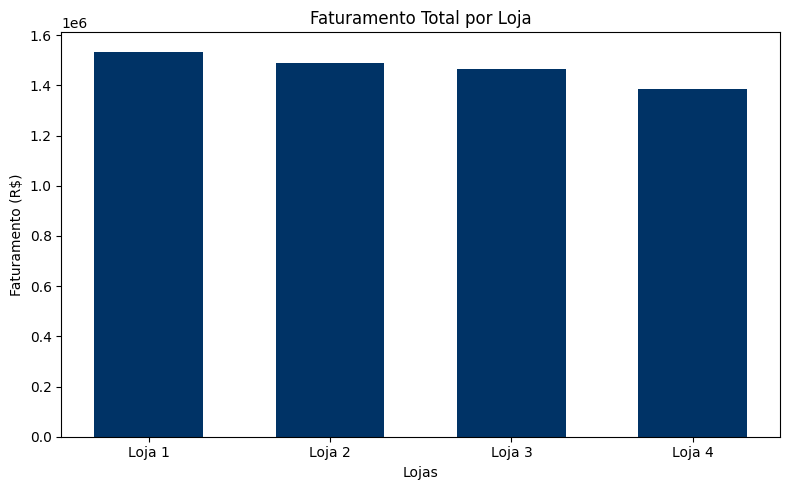

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(faturamentos.keys(), faturamentos.values(), color='#003366', width=0.6)
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Lojas")
plt.tight_layout()
plt.show()


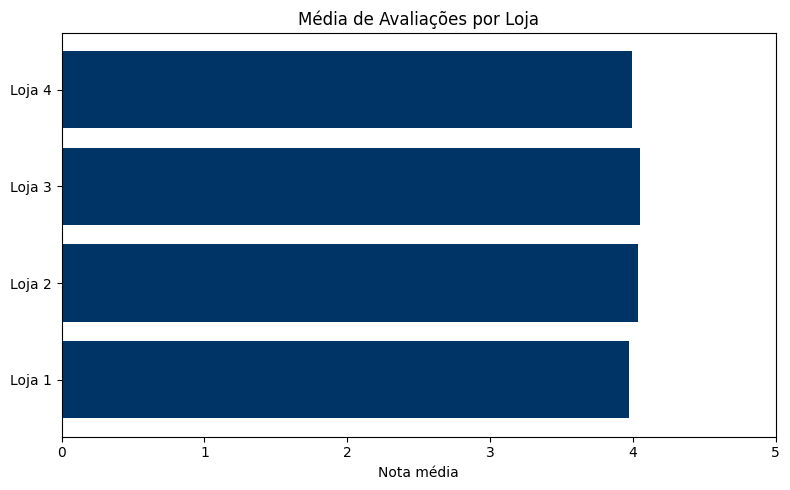

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(list(media_avaliacoes.keys()), list(media_avaliacoes.values()), color='#003366')
plt.title("Média de Avaliações por Loja")
plt.xlabel("Nota média")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


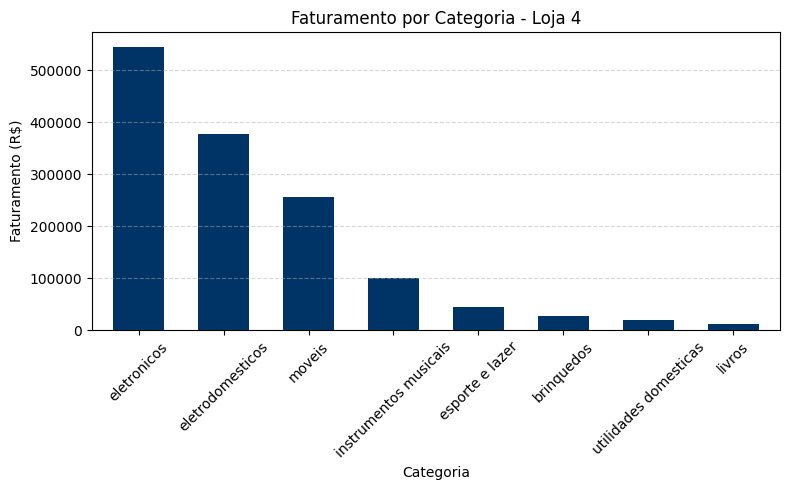

In [ ]:
plt.figure(figsize=(8,5))
faturamento_categoria4.plot(kind='bar', color='#003366', width=0.6)
plt.title("Faturamento por Categoria - Loja 4")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Categoria")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#Relatório Final — Análise de Lojas Alura Store

## Introdução

O objetivo desta análise é auxiliar o Sr. João na decisão de qual das quatro lojas da rede Alura Store deve ser vendida, com o intuito de gerar capital para investir em um novo negócio.  
Foram analisados diversos fatores, incluindo faturamento total, categorias de produtos, avaliações de clientes, produtos mais e menos vendidos e o frete médio das lojas.

A análise foi realizada utilizando ferramentas de Python como Pandas e Matplotlib, com foco em clareza e visualização de dados.

---

## Desenvolvimento

### 1. Faturamento Total das Lojas

- **Loja 1:** `R$ 1.534.509,12`
- **Loja 2:** `R$ 1.488.459,06`
- **Loja 3:** `R$ 1.464.025,03`
- **Loja 4:** `R$ 1.384.497,58`

**A Loja 1 obteve o maior faturamento, enquanto a Loja 4 apresentou o menor faturamento.**

---

### 2. Categorias de Produtos

- **Eletrônicos** e **Eletrodomésticos** são as categorias líderes em faturamento em todas as lojas.
- **Livros** e **Utilidades Domésticas** representam uma parcela pequena das receitas.

**A dependência de poucas categorias é alta em todas as lojas.**

---

### 3. Média das Avaliações dos Clientes

- **Loja 1:** `3,98`
- **Loja 2:** `4,04`
- **Loja 3:** `4,05`
- **Loja 4:** `4,00`

**A Loja 3 possui a média de avaliação ligeiramente superior às demais. Porém, a diferença entre todas as lojas é pequena.**

---

### 4. Produtos Mais e Menos Vendidos

- Produtos mais vendidos: **Micro-ondas**, **Smart TVs**, **Blocos de Montar**.
- Produtos menos vendidos: **Pandeiro**, **Assistente Virtual**, **Boneca Bebê**.

**A maioria das vendas está concentrada em poucos produtos fortes.**

---

### 5. Frete Médio por Loja

- **Loja 1:** frete médio elevado em eletrodomésticos (`R$ 82,58`)
- **Loja 2:** frete médio de `R$ 81,12`
- **Loja 3:** frete médio de `R$ 83,90`
- **Loja 4:** melhor controle de frete, `R$ 78,86`

**A Loja 4 possui o menor frete médio entre as lojas.**

---

## Conclusão e Recomendação

Com base nas métricas analisadas, a recomendação é que o Sr. João **venda a Loja 4**.

Motivos principais:

- A Loja 4 possui o **menor faturamento** entre todas as lojas.
- Sua **avaliação média** é similar às demais, não sendo um diferencial.
- Apesar do **frete médio mais baixo**, isso não resultou em superioridade de vendas ou faturamento.
- Não apresenta vantagens claras em termos de categorias de produtos ou produtos vendidos.

**Portanto, a Loja 4 é a escolha mais adequada para venda, liberando capital para novos investimentos.**

---
